In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
Bank = pd.read_csv(f'C:/Users/HP PC/OneDrive/Desktop/Prodigy Info Tech/Task 3/Bank Details/Bank Marketing.csv', sep = ',')
print('Bank:\n', Bank)

Bank:
        Age      Job   Marital Education Default  Balance Housing Loan  \
0       18  Student    Single   Unknown      No      108      No   No   
1       18  Student    Single   Primary      No      608      No   No   
2       18  Student    Single   Unknown      No      108      No   No   
3       18  Student    Single   Primary      No      608      No   No   
4       18  Student    Single   Unknown      No      108      No   No   
...    ...      ...       ...       ...     ...      ...     ...  ...   
11157   92  Retired   Married   Unknown      No      775      No   No   
11158   92  Retired   Married   Unknown      No      775      No   No   
11159   93  Retired   Married   Unknown      No      775      No   No   
11160   93  Retired   Married   Unknown      No      775      No   No   
11161   95  Retired  Divorced   Primary      No     2282      No   No   

         Contact  Day Month  Duration  Campaign  PDays  Previous POutcome  \
0       Cellular   10   Aug       167  

In [3]:
Columns_List = Bank.columns
print('Columns Description:', Columns_List)

Columns Description: Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing',
       'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign', 'PDays',
       'Previous', 'POutcome', 'Deposit'],
      dtype='object')


In [4]:
Shape = Bank.shape
print('Shape Value:', Shape)

Shape Value: (11162, 17)


In [5]:
Mean = Bank.mean
print('Mean Value:\n', Mean)

Mean Value:
 <bound method NDFrame._add_numeric_operations.<locals>.mean of        Age      Job   Marital Education Default  Balance Housing Loan  \
0       18  Student    Single   Unknown      No      108      No   No   
1       18  Student    Single   Primary      No      608      No   No   
2       18  Student    Single   Unknown      No      108      No   No   
3       18  Student    Single   Primary      No      608      No   No   
4       18  Student    Single   Unknown      No      108      No   No   
...    ...      ...       ...       ...     ...      ...     ...  ...   
11157   92  Retired   Married   Unknown      No      775      No   No   
11158   92  Retired   Married   Unknown      No      775      No   No   
11159   93  Retired   Married   Unknown      No      775      No   No   
11160   93  Retired   Married   Unknown      No      775      No   No   
11161   95  Retired  Divorced   Primary      No     2282      No   No   

         Contact  Day Month  Duration  Campaign

In [6]:
Head = Bank.head(5)
print('Head Value:\n', Head)

Head Value:
    Age      Job Marital Education Default  Balance Housing Loan   Contact  \
0   18  Student  Single   Unknown      No      108      No   No  Cellular   
1   18  Student  Single   Primary      No      608      No   No  Cellular   
2   18  Student  Single   Unknown      No      108      No   No  Cellular   
3   18  Student  Single   Primary      No      608      No   No  Cellular   
4   18  Student  Single   Unknown      No      108      No   No  Cellular   

   Day Month  Duration  Campaign  PDays  Previous POutcome Deposit  
0   10   Aug       167         1     -1         0  Unknown     Yes  
1   12   Aug       267         1     -1         0  Unknown     Yes  
2    8   Sep       169         1     -1         0  Unknown     Yes  
3   13   Nov       210         1     93         1  Success     Yes  
4    9   Feb        92         1    183         1  Success     Yes  


In [7]:
Tail = Bank.tail(5)
print('Tail Value:\n', Tail)

Tail Value:
        Age      Job   Marital Education Default  Balance Housing Loan  \
11157   92  Retired   Married   Unknown      No      775      No   No   
11158   92  Retired   Married   Unknown      No      775      No   No   
11159   93  Retired   Married   Unknown      No      775      No   No   
11160   93  Retired   Married   Unknown      No      775      No   No   
11161   95  Retired  Divorced   Primary      No     2282      No   No   

         Contact  Day Month  Duration  Campaign  PDays  Previous POutcome  \
11157   Cellular   22   Oct       313         3     -1         0  Unknown   
11158   Cellular   26   jan       164         4     96         3  Success   
11159   Cellular   22   Jul       860         2    177         7  Success   
11160   Cellular    4   Aug       476         2     13         9  Success   
11161  Telephone   21   Apr       207        17     -1         0  Unknown   

      Deposit  
11157     Yes  
11158     Yes  
11159     Yes  
11160     Yes  
11161

In [8]:
Data_Types = Bank.dtypes
print('Data Types:\n', Data_Types)

Data Types:
 Age           int64
Job          object
Marital      object
Education    object
Default      object
Balance       int64
Housing      object
Loan         object
Contact      object
Day           int64
Month        object
Duration      int64
Campaign      int64
PDays         int64
Previous      int64
POutcome     object
Deposit      object
dtype: object


In [9]:
Information = Bank.info()
print('Dataset Information:\n', Information)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        11162 non-null  int64 
 1   Job        11162 non-null  object
 2   Marital    11162 non-null  object
 3   Education  11162 non-null  object
 4   Default    11162 non-null  object
 5   Balance    11162 non-null  int64 
 6   Housing    11162 non-null  object
 7   Loan       11162 non-null  object
 8   Contact    11162 non-null  object
 9   Day        11162 non-null  int64 
 10  Month      11162 non-null  object
 11  Duration   11162 non-null  int64 
 12  Campaign   11162 non-null  int64 
 13  PDays      11162 non-null  int64 
 14  Previous   11162 non-null  int64 
 15  POutcome   11162 non-null  object
 16  Deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
Dataset Information:
 None


In [10]:
Duplicates = (Bank.duplicated().sum() / 11162) * 100
print('Duplicates:\n', Duplicates)

Duplicates:
 0.0


In [11]:
Investigating_Duplicates = Bank[Bank.duplicated()]
print('Investigating Duplicates:\n', Investigating_Duplicates)

Investigating Duplicates:
 Empty DataFrame
Columns: [Age, Job, Marital, Education, Default, Balance, Housing, Loan, Contact, Day, Month, Duration, Campaign, PDays, Previous, POutcome, Deposit]
Index: []


In [12]:
Null = (Bank.isnull().sum() / 11162) * 100
print('Null Value Percentage:\n', Null)

Null Value Percentage:
 Age          0.0
Job          0.0
Marital      0.0
Education    0.0
Default      0.0
Balance      0.0
Housing      0.0
Loan         0.0
Contact      0.0
Day          0.0
Month        0.0
Duration     0.0
Campaign     0.0
PDays        0.0
Previous     0.0
POutcome     0.0
Deposit      0.0
dtype: float64


In [13]:
NUnique = Bank.nunique()
print('NUnique Values:\n', NUnique)

NUnique Values:
 Age            76
Job            12
Marital         3
Education       4
Default         2
Balance      3805
Housing         2
Loan            2
Contact         3
Day            31
Month          12
Duration     1428
Campaign       36
PDays         472
Previous       34
POutcome        4
Deposit         2
dtype: int64


In [14]:
Describe = Bank.describe(include = 'all').T
print('Describe Values:\n', Describe)

Describe Values:
              count unique         top   freq         mean          std  \
Age        11162.0    NaN         NaN    NaN    41.231948    11.913369   
Job          11162     12  Management   2566          NaN          NaN   
Marital      11162      3     Married   6351          NaN          NaN   
Education    11162      4   Secondary   5476          NaN          NaN   
Default      11162      2          No  10994          NaN          NaN   
Balance    11162.0    NaN         NaN    NaN  1528.538524  3225.413326   
Housing      11162      2          No   5881          NaN          NaN   
Loan         11162      2          No   9702          NaN          NaN   
Contact      11162      3    Cellular   8042          NaN          NaN   
Day        11162.0    NaN         NaN    NaN    15.658036      8.42074   
Month        11162     12         May   2824          NaN          NaN   
Duration   11162.0    NaN         NaN    NaN   371.993818   347.128386   
Campaign   11162.0  

Histogram Plot Visualization:



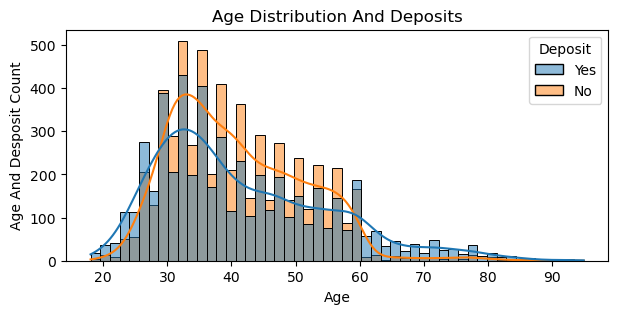

In [15]:
print('Histogram Plot Visualization:\n')
plt.figure(figsize = (7,3))
sns.histplot(data = Bank, x = 'Age', kde = 'True', hue = 'Deposit').set(title = 'Age Distribution And Deposits')
plt.ylabel('Age And Desposit Count')
plt.show()

Count Plot Visualization:



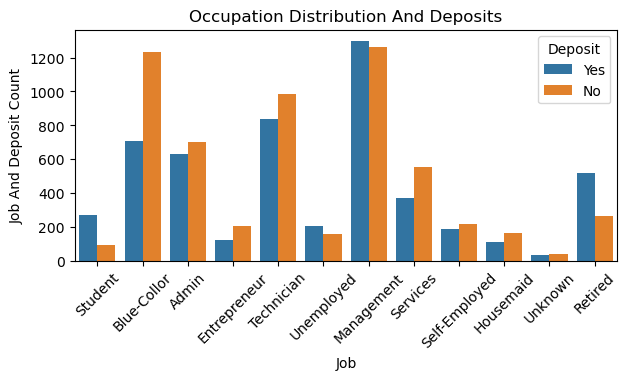

In [16]:
print('Count Plot Visualization:\n')
plt.figure(figsize = (7,3))
sns.countplot(data = Bank, x = 'Job', hue = 'Deposit').set(title = 'Occupation Distribution And Deposits')
plt.xticks(rotation = 45)
plt.ylabel('Job And Deposit Count')
plt.show()

Count Plot Visualization:



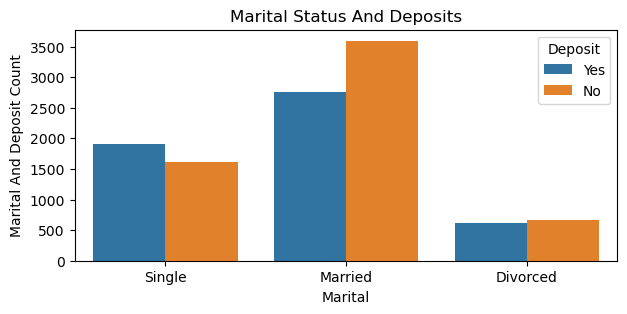

In [17]:
print('Count Plot Visualization:\n')
plt.figure(figsize = (7,3))
sns.countplot(data = Bank, x = 'Marital', hue = 'Deposit').set(title = 'Marital Status And Deposits')
plt.ylabel('Marital And Deposit Count')
plt.show()

Count Plot Visualization:



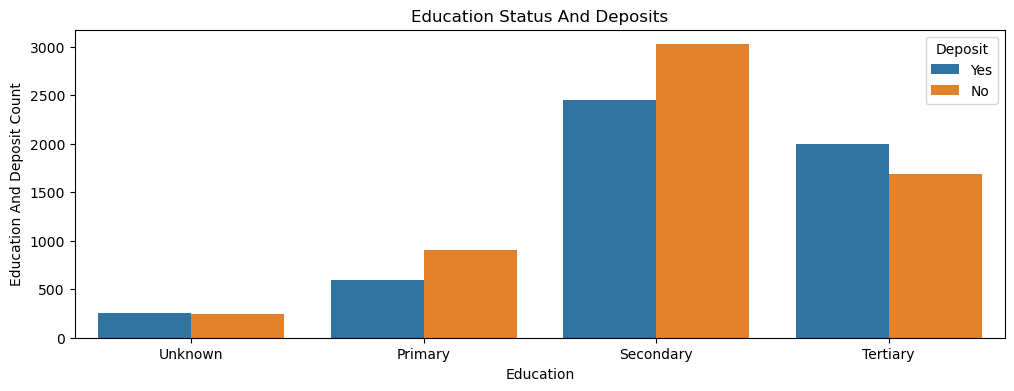

In [18]:
print('Count Plot Visualization:\n')
plt.figure(figsize = (12,4))
sns.countplot(data = Bank, x = 'Education', hue = 'Deposit').set(title = 'Education Status And Deposits')
plt.ylabel('Education And Deposit Count')
plt.show()

In [19]:
Defaulters = Bank.Default.value_counts()
print('Defaulters:\n', Defaulters)

Defaulters:
 Default
No     10994
Yes      168
Name: count, dtype: int64


Count Plot Visualization:



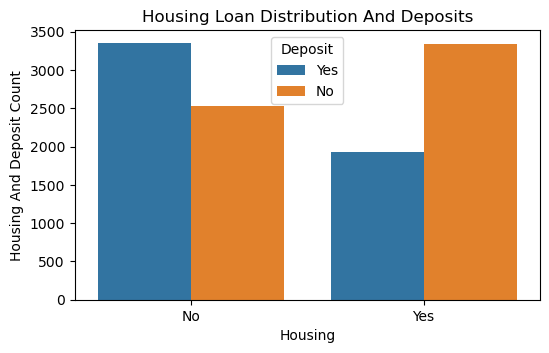

In [20]:
print('Count Plot Visualization:\n')
plt.figure(figsize = (6,3.5))
sns.countplot(data = Bank, x = 'Housing', hue = 'Deposit').set(title = 'Housing Loan Distribution And Deposits')
plt.ylabel('Housing And Deposit Count')
plt.show()

Count Plot Visualization:



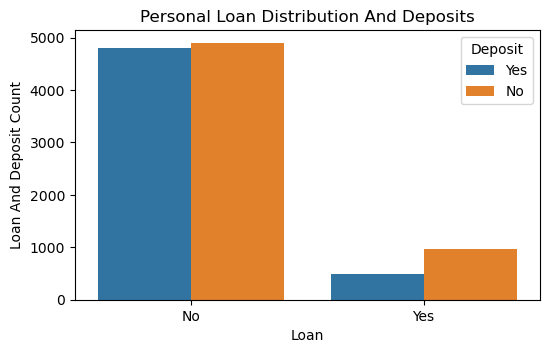

In [21]:
print('Count Plot Visualization:\n')
plt.figure(figsize = (6,3.5))
sns.countplot(data = Bank, x = 'Loan', hue = 'Deposit').set(title = 'Personal Loan Distribution And Deposits')
plt.ylabel('Loan And Deposit Count')
plt.show()

In [22]:
Bank_Deposit = Bank.Deposit.value_counts()
print('Bank Deposit Values:\n', Bank_Deposit)

Bank Deposit Values:
 Deposit
No     5873
Yes    5289
Name: count, dtype: int64


In [23]:
Keys = Bank_Deposit.index
print('Key Values:\n', Keys)

Key Values:
 Index(['No', 'Yes'], dtype='object', name='Deposit')


In [24]:
Data = Bank_Deposit.values
print('Data Value:\n', Data)

Data Value:
 [5873 5289]


In [25]:
Explode = [0,0.1]
print('Explode Values:\n', Explode)

Explode Values:
 [0, 0.1]


Pie - Chart Plot Visualization:



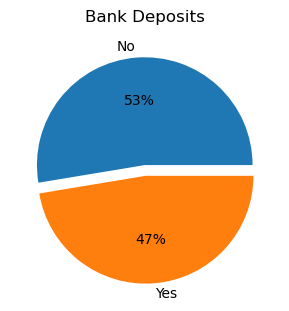

In [26]:
print('Pie - Chart Plot Visualization:\n')
plt.figure(figsize = (6,3.5))
plt.pie(Data, labels = Keys, explode = Explode, autopct = '%.0f%%')
plt.title('Bank Deposits')
plt.show()

In [27]:
Dynamic_Columns = Bank.select_dtypes('object').columns
print('Dynamic Columns:\n', Dynamic_Columns)

Dynamic Columns:
 Index(['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact',
       'Month', 'POutcome', 'Deposit'],
      dtype='object')


In [28]:
Label_Encoder = LabelEncoder()
Bank[Dynamic_Columns] = Bank[Dynamic_Columns].apply(Label_Encoder.fit_transform)

Heat Map Plot Visualization:



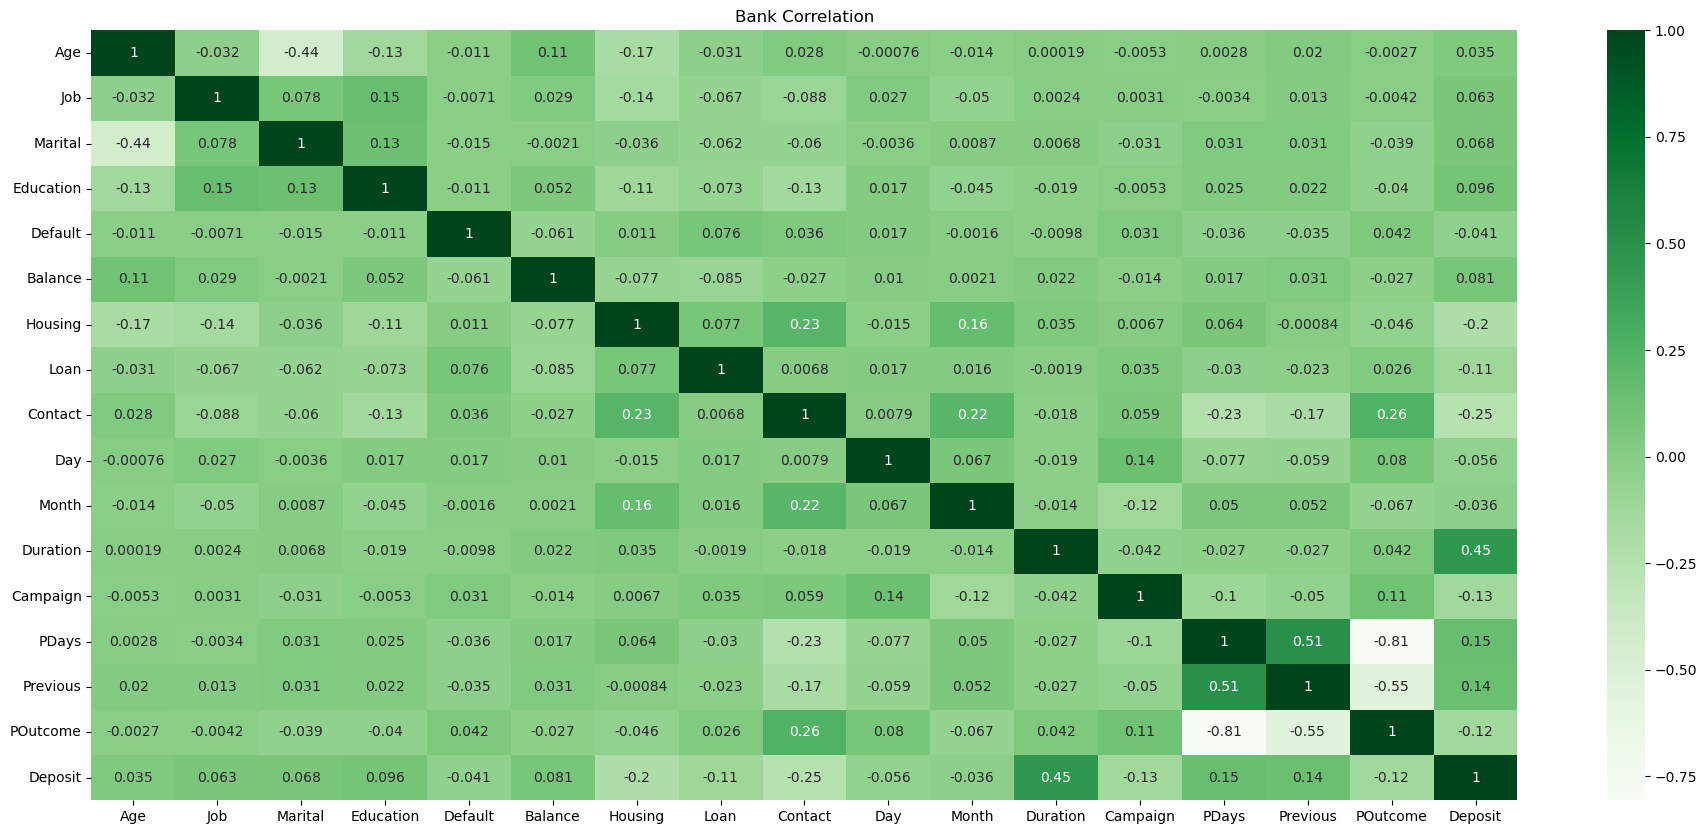

In [29]:
print('Heat Map Plot Visualization:\n')
plt.figure(figsize = (23,10))
sns.heatmap(data = Bank.corr(), cmap = 'Greens', annot = True).set(title = 'Bank Correlation')
plt.show()

In [30]:
X = Bank.drop('Deposit', axis = 1)
print('X - Value:\n', X)
Y = Bank.Deposit
print('Y - Value:\n', Y)

X - Value:
        Age  Job  Marital  Education  Default  Balance  Housing  Loan  Contact  \
0       18    8        2          3        0      108        0     0        0   
1       18    8        2          0        0      608        0     0        0   
2       18    8        2          3        0      108        0     0        0   
3       18    8        2          0        0      608        0     0        0   
4       18    8        2          3        0      108        0     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
11157   92    5        1          3        0      775        0     0        0   
11158   92    5        1          3        0      775        0     0        0   
11159   93    5        1          3        0      775        0     0        0   
11160   93    5        1          3        0      775        0     0        0   
11161   95    5        0          0        0     2282        0     0        1   

       Day  Mon

In [31]:
Standard_Scaler = StandardScaler()
X_Scaled = pd.DataFrame(Standard_Scaler.fit_transform(X), columns = X.columns)

In [32]:
train_X, test_X, train_y, test_y = train_test_split(X_Scaled, Y, test_size = 0.3)

In [33]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [34]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))

Train Score: 1.0
Test Score: 0.7721707972529113


In [35]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

0.7729411658691754

In [36]:
ypred = decision_tree.predict(test_X)
print(classification_report(test_y, ypred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1755
           1       0.77      0.75      0.76      1594

    accuracy                           0.77      3349
   macro avg       0.77      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349



In [37]:
param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

print('Paramaters Grid:\n', param_grid)

Paramaters Grid:
 {'max_depth': [3, 5, 7, 10, None], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [3, 5, 7, 9, 10, 20]}


In [38]:
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
print('GSCV:\n', gscv)

GSCV:
 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)


In [39]:
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [40]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 20}

In [41]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=20)

In [42]:
cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean() 

0.8153101942077638

In [43]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [44]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.8123640087034429
Test Score: 0.8020304568527918


In [45]:
pred_y = clf.predict(test_X)

Display Matrix Plot Visualization:



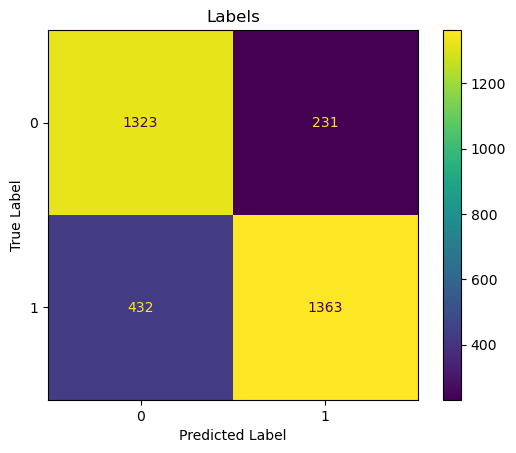

In [46]:
print('Display Matrix Plot Visualization:\n')
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels = clf.classes_).plot()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Labels')
plt.show()

In [47]:
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1554
           1       0.86      0.76      0.80      1795

    accuracy                           0.80      3349
   macro avg       0.80      0.81      0.80      3349
weighted avg       0.81      0.80      0.80      3349



In [48]:
accuracy = accuracy_score(test_y, pred_y)
print('Test Accuracy of Decision Tree Classifier : {}'.format(accuracy * 100))

Test Accuracy of Decision Tree Classifier : 80.20304568527918


In [49]:
Cross_val = cross_val_score(clf, test_X,test_y, cv = 5).mean()     
print('Cross-Validation Accuracy Scores Decision Tree : ', Cross_val * 100)

Cross-Validation Accuracy Scores Decision Tree :  75.48495192200433


Tree Plot Visualization:



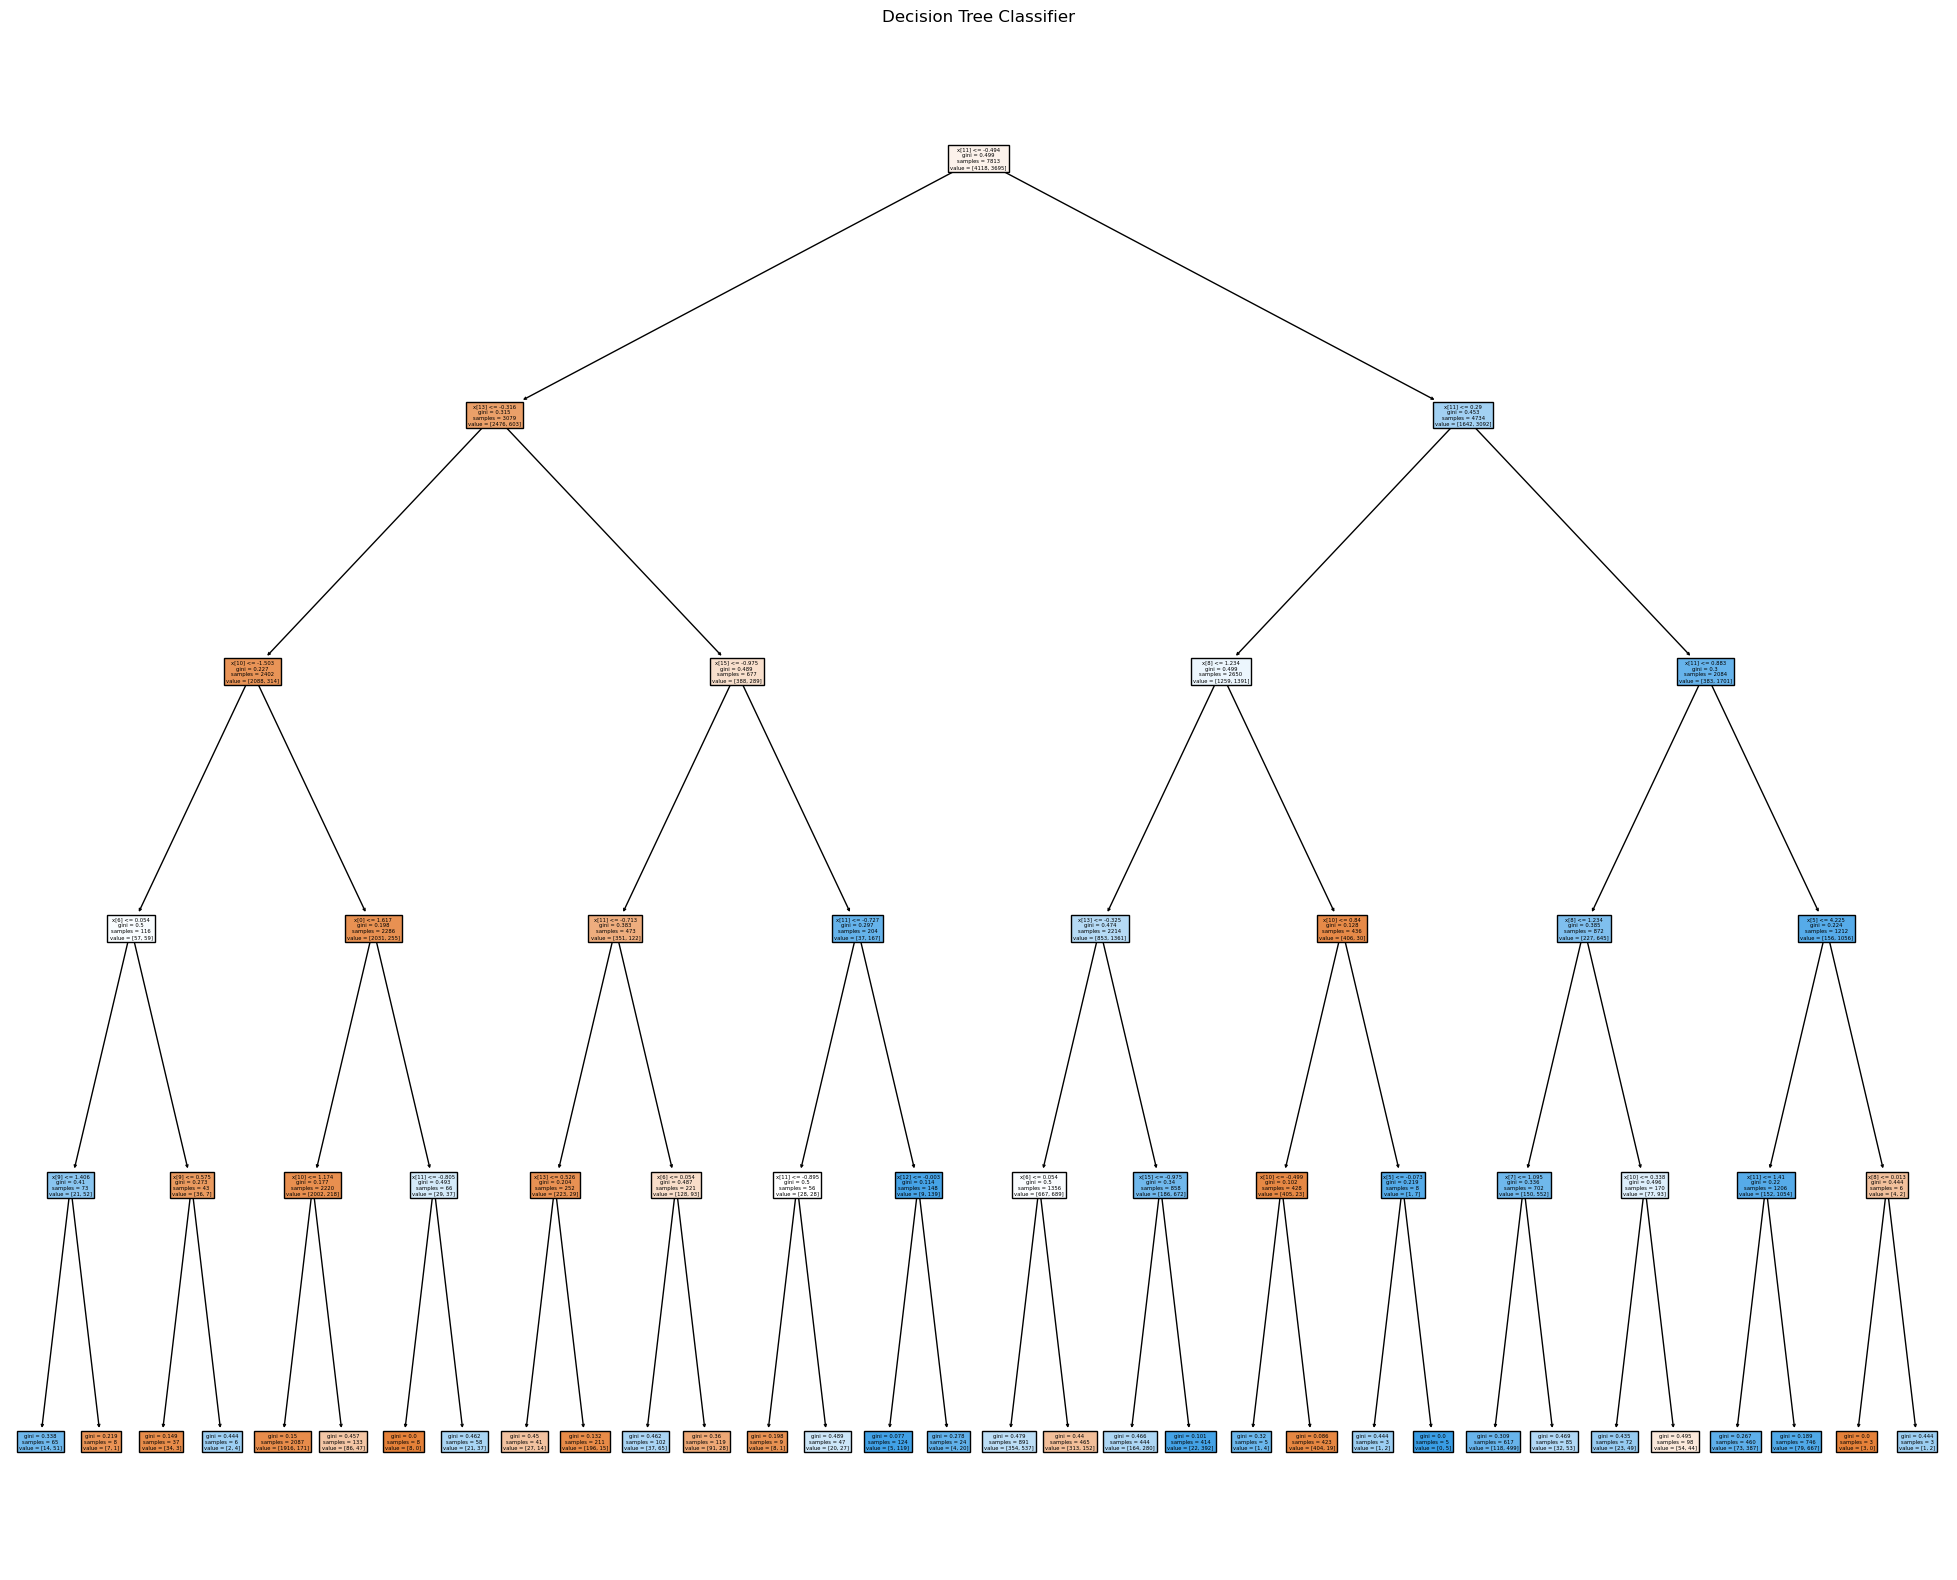

In [50]:
print('Tree Plot Visualization:\n')
fig = plt.figure(figsize = (25,20))
tree.plot_tree(clf, filled = True)
plt.title('Decision Tree Classifier')
plt.show()